In [14]:
import pandas as pd 

canada_df = pd.read_csv("data\\Canada_dataset.csv")
canada_df


,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,Canada,SE649035-145565,River,12-01-1974,0.059248,1.3000,8.15000,0.011917,8.075000,9.88500,0.343917,11.731550,100.000000,Excellent
1,Canada,SE649035-145565,River,12-01-1975,0.039821,1.3800,7.80000,0.009417,7.733330,10.15000,0.449083,11.820090,100.000000,Excellent
2,Canada,SE649035-145565,River,12-01-1976,0.031341,2.2300,7.80000,0.011000,7.466670,10.23500,0.220750,14.874720,100.000000,Excellent
3,Canada,SE649035-145565,River,12-01-1977,0.020501,1.6100,8.15000,0.012333,7.783330,11.11600,0.572250,15.892930,100.000000,Excellent
4,Canada,SE649035-145565,River,12-01-1978,0.020023,1.6400,4.37080,0.006182,7.100000,7.06800,0.371091,15.228880,100.000000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,Canada,ES030ESPFTA51104002,River,12-01-2009,0.432768,3.3333,6.38000,0.098900,6.500000,11.25000,0.080500,4.166692,91.923509,Good
3945,Canada,ES030ESPFTA51104002,River,12-01-2010,1.132667,1.6667,8.32000,0.113200,6.633300,12.86000,0.058500,3.097572,83.081956,Good
3946,Canada,ITI019T1TA,River,12-01-2011,0.019320,1.2750,11.27500,0.010000,8.555600,13.24440,0.058500,1.217425,93.195590,Good
3947,Canada,ITR1101414MU,River,12-01-2012,0.230475,2.0000,9.79231,0.019568,7.410000,9.87623,0.058500,14.207128,100.000000,Excellent


In [4]:
canada_df["Waterbody Type"].value_counts()


Waterbody Type
River           3288
Lake             602
Transitional      57
Coastal            2
Name: count, dtype: int64

In [29]:

canada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           3949 non-null   object 
 1   Area                              3949 non-null   object 
 2   Waterbody Type                    3949 non-null   object 
 3   Date                              3949 non-null   object 
 4   Ammonia (mg/l)                    3949 non-null   float64
 5   Biochemical Oxygen Demand (mg/l)  3949 non-null   float64
 6   Dissolved Oxygen (mg/l)           3949 non-null   float64
 7   Orthophosphate (mg/l)             3949 non-null   float64
 8   pH (ph units)                     3949 non-null   float64
 9   Temperature (cel)                 3949 non-null   float64
 10  Nitrogen (mg/l)                   3949 non-null   float64
 11  Nitrate (mg/l)                    3949 non-null   float64
 12  CCME_V

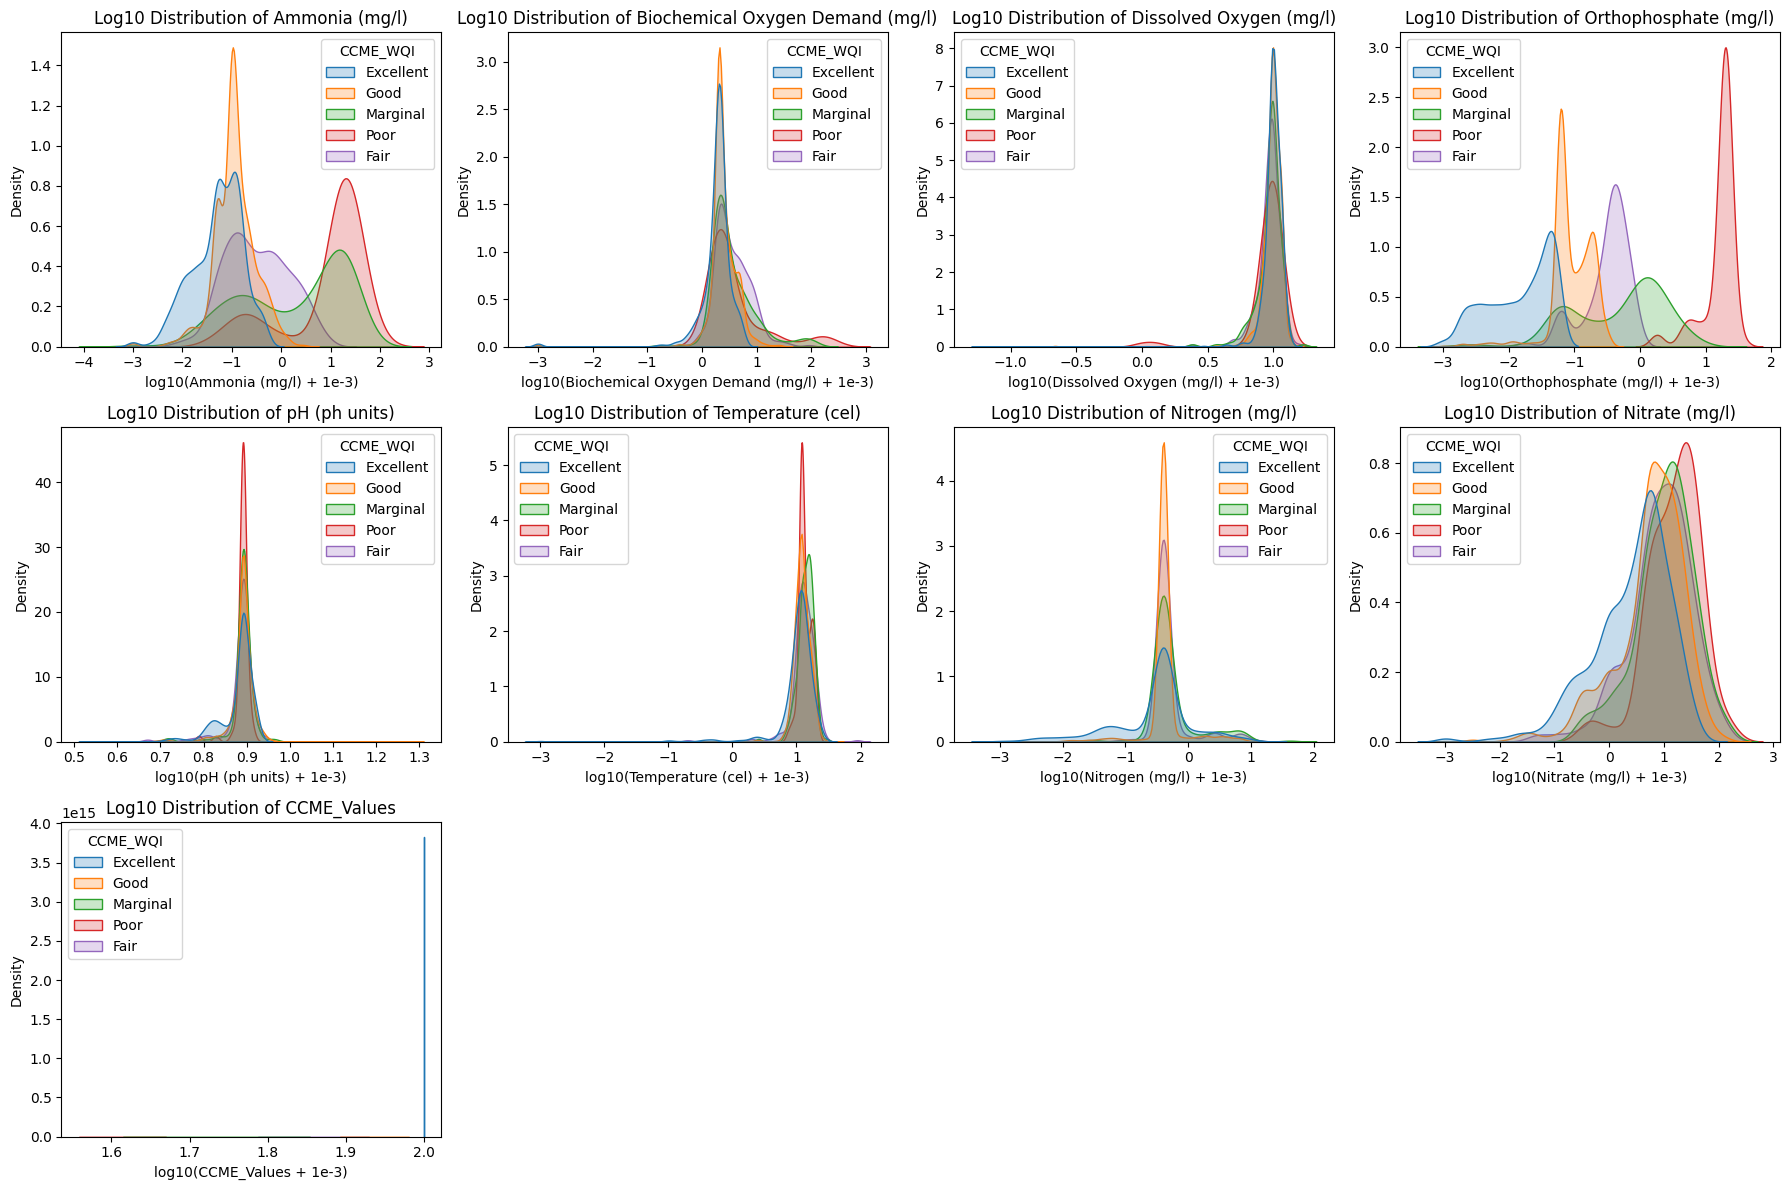

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = canada_df.select_dtypes(include='number').columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, start=1):
    # Προσθέτουμε 1e-3 για αποφυγή προβλημάτων με log(0)
    values = canada_df[col] + 1e-3
    values = values[values > 0]  # μόνο θετικές τιμές
    if values.empty:
        continue

    plt.subplot(3, 4, i)
    sns.kdeplot(
        x=np.log10(values),
        hue=canada_df.loc[values.index, 'CCME_WQI'],
        fill=True,
        warn_singular=False,
        common_norm=False
    )
    plt.title(f'Log10 Distribution of {col}')
    plt.xlabel(f'log10({col} + 1e-3)')
    plt.tight_layout()

plt.show()


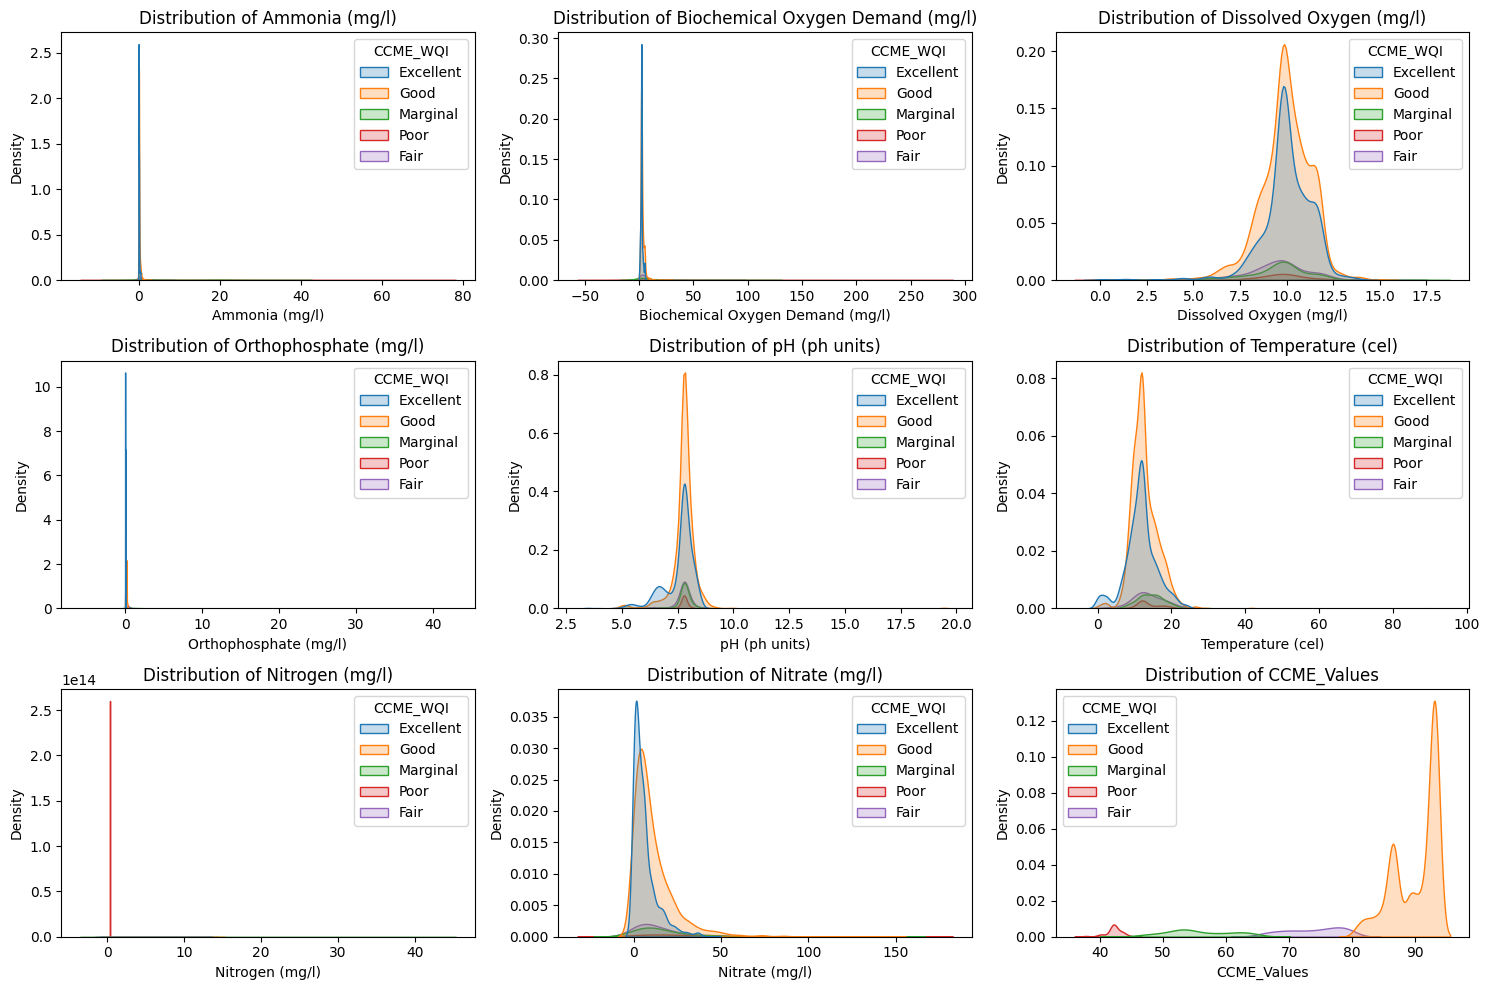

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = canada_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=canada_df, x=col, hue='CCME_WQI', fill=True, warn_singular=False)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()


In [32]:
canada_df.describe()

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
count,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000
mean,0.846663,3.185695,9.897147,0.426357,7.687966,12.421282,0.678823,10.201613,90.217478
std,3.619717,7.392624,1.440963,2.370401,0.633751,4.077683,1.391708,13.711237,12.364585
min,0.000000,0.000000,0.058333,0.000000,3.475000,0.000000,0.000000,0.000000,37.659232
25%,0.050000,2.000000,9.300000,0.030000,7.640000,10.171667,0.400000,2.080690,86.597009
50%,0.100000,2.133330,9.824000,0.061000,7.790000,12.000000,0.400000,5.836820,93.116725
75%,0.195900,3.000000,10.775000,0.149700,7.933330,14.600000,0.400000,13.083650,100.000000
max,63.836364,231.108000,16.930476,35.337500,19.445000,89.000000,41.784200,150.000000,100.000000


(array([  60.,   27.,   88.,   47.,   73.,   82.,  141.,  602., 1428.,
        1401.]),
 array([ 37.65923163,  43.89330846,  50.1273853 ,  56.36146214,
         62.59553898,  68.82961581,  75.06369265,  81.29776949,
         87.53184633,  93.76592316, 100.        ]),
 <BarContainer object of 10 artists>)

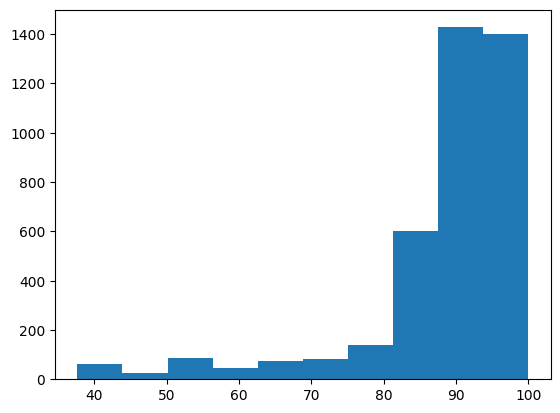

In [33]:
plt.hist(canada_df["CCME_Values"])




In [34]:
# canada_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in canada_df.columns]
# usa_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in usa_df.columns]
canada_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in canada_df.columns]



# Define features and target
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

##### Binary - Clasification 


In [35]:
# canada_df['wqi_binary'] = canada_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)
# usa_df['wqi_binary'] = usa_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)
canada_df['wqi_binary'] = canada_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)

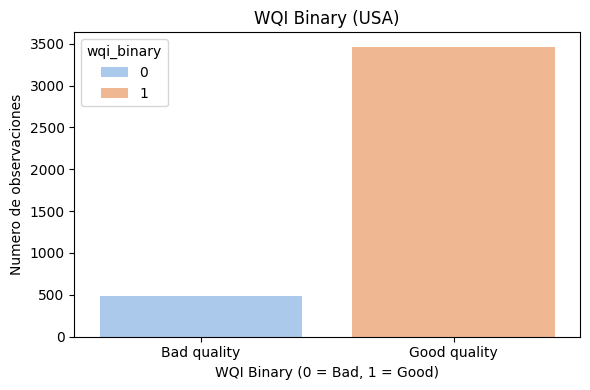

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram (countplot) for the binary target in Canada before prediction
plt.figure(figsize=(6, 4))
# sns.countplot(data=canada_df, x='wqi_binary', palette='pastel',hue='wqi_binary')
# sns.countplot(data=usa_df, x='wqi_binary', palette='pastel',hue='wqi_binary')
sns.countplot(data=canada_df, x='wqi_binary', palette='pastel',hue='wqi_binary')

plt.title('WQI Binary (USA)')
plt.xlabel('WQI Binary (0 = Bad, 1 = Good)')
plt.ylabel('Numero de observaciones')
plt.xticks([0, 1], ['Bad quality', 'Good quality'])
plt.tight_layout()
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier


X = canada_df[feature_cols]
y = canada_df['wqi_binary']
class_counts = Counter(y)
scale_ratio = class_counts[0] / class_counts[1]
# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)



model = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42)



pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

scores.mean(), report, conf_matrix

(0.964564977187424,
 {'0': {'precision': 0.8818181818181818,
   'recall': 1.0,
   'f1-score': 0.9371980676328503,
   'support': 97.0},
  '1': {'precision': 1.0,
   'recall': 0.9812409812409812,
   'f1-score': 0.9905316824471959,
   'support': 693.0},
  'accuracy': 0.9835443037974684,
  'macro avg': {'precision': 0.9409090909090909,
   'recall': 0.9906204906204906,
   'f1-score': 0.9638648750400232,
   'support': 790.0},
  'weighted avg': {'precision': 0.9854890678941312,
   'recall': 0.9835443037974684,
   'f1-score': 0.9839831246788522,
   'support': 790.0}},
 array([[ 97,   0],
        [ 13, 680]], dtype=int64))

In [38]:
canada_df.head()

,country,area,waterbody_type,date,ammonia_mg_l,biochemical_oxygen_demand_mg_l,dissolved_oxygen_mg_l,orthophosphate_mg_l,ph_ph_units,temperature_cel,nitrogen_mg_l,nitrate_mg_l,ccme_values,ccme_wqi,wqi_binary
0,Canada,SE649035-145565,River,12-01-1974,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent,1
1,Canada,SE649035-145565,River,12-01-1975,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent,1
2,Canada,SE649035-145565,River,12-01-1976,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent,1
3,Canada,SE649035-145565,River,12-01-1977,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent,1
4,Canada,SE649035-145565,River,12-01-1978,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent,1


#### Multi - Clasificacion 

(array([1401.,    0., 2061.,    0.,    0.,  190.,    0.,   63.,    0.,
         234.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

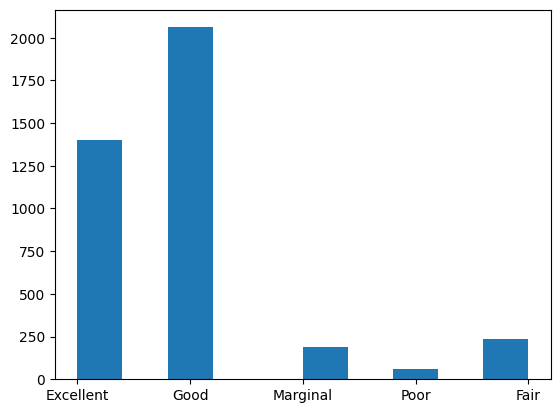

In [39]:
plt.hist(canada_df["ccme_wqi"])

In [40]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

y_multi = canada_df['ccme_wqi']
X = canada_df[feature_cols]

# Orden de categorias
quality_order = [['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']]
oe = OrdinalEncoder(categories=quality_order)

y_array = np.array(y_multi).reshape(-1, 1)
y_encoded = oe.fit_transform(y_array).ravel()

# Modelos 
model = XGBClassifier(random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)

#  Pipeline 
pipeline_multi = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_multi, X, y_encoded, cv=cv, scoring='f1_macro')

print("Cross-validated F1-macro scores:", scores)
print("Average F1-macro:", np.mean(scores))

# Cross-validated predictions for classification report 
y_pred_cv = cross_val_predict(pipeline_multi, X, y_encoded, cv=cv)

#  Inverse transform 
y_pred_labels_cv = oe.inverse_transform(y_pred_cv.reshape(-1, 1)).ravel()
y_true_labels_cv = oe.inverse_transform(y_encoded.reshape(-1, 1)).ravel()

labels_order = ['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']
print(classification_report(
    y_true_labels_cv,
    y_pred_labels_cv,
    labels=labels_order,
    target_names=labels_order
))


Cross-validated F1-macro scores: [0.94224262 0.95022217 0.95386631 0.95644621 0.9622061 ]
Average F1-macro: 0.9529966809869066
              precision    recall  f1-score   support

        Poor       0.95      0.97      0.96        63
    Marginal       0.95      0.93      0.94       190
        Fair       0.87      0.89      0.88       234
        Good       0.99      0.98      0.99      2061
   Excellent       0.99      1.00      0.99      1401

    accuracy                           0.98      3949
   macro avg       0.95      0.95      0.95      3949
weighted avg       0.98      0.98      0.98      3949



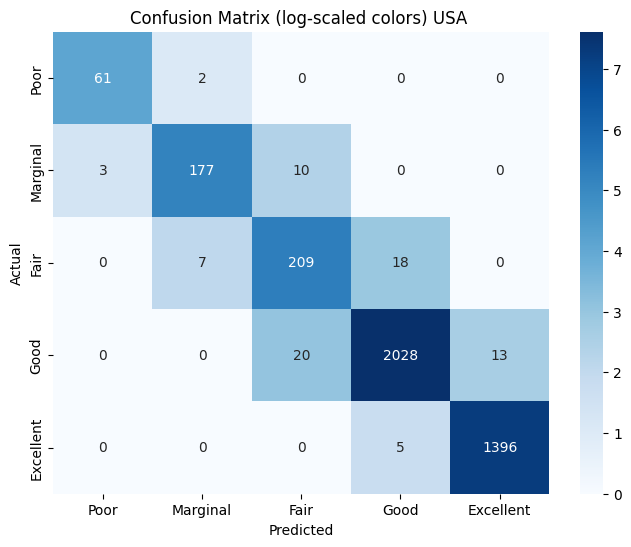

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion Matrix  
cm = confusion_matrix(y_true_labels_cv, y_pred_labels_cv, labels=labels_order)

plt.figure(figsize=(8, 6))
sns.heatmap(
    np.log1p(cm),  # log(1 + x) por evitar log(0)
    annot=cm,
    fmt='d',
    cmap='Blues',
    xticklabels=labels_order,
    yticklabels=labels_order
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (log-scaled colors) Canada ')
plt.show()


In [ ]:

pipeline_multi.fit(X, y_encoded)
xgb_model = pipeline_multi.named_steps['classifier']

importances = xgb_model.feature_importances_

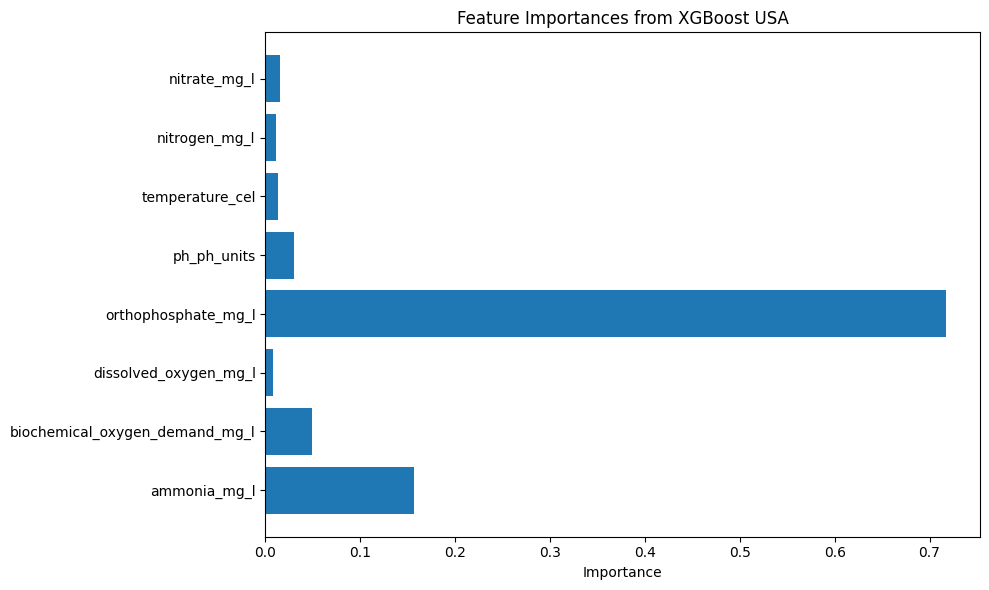

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost Canada')
plt.tight_layout()
plt.show()

In [44]:
# Predict probabilities for class 0 (Bad water)
y_proba = pipeline.predict_proba(X_test)[:, 0]

# Create alert levels
X_test_alerts = X_test.copy()
X_test_alerts['proba_bad'] = y_proba
X_test_alerts['true_label'] = y_test.values
X_test_alerts['alert_level'] = pd.cut(
    y_proba,
    bins=[0, 0.4, 0.7, 1],
    labels=['Safe', 'Moderate Risk', 'High Risk']
)

# Return top 10 risk cases
X_test_alerts[['proba_bad', 'true_label', 'alert_level']].sort_values(by='proba_bad', ascending=False)


,proba_bad,true_label,alert_level
2510,0.999985,0,High Risk
838,0.999979,0,High Risk
2656,0.999976,0,High Risk
3388,0.999976,0,High Risk
1177,0.999973,0,High Risk
...,...,...,...
2035,0.000004,1,Safe
3863,0.000004,1,Safe
2174,0.000004,1,Safe
1904,0.000004,1,Safe


### Regresion 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Datos
X = canada_df[feature_cols]
y = canada_df['ccme_values']

# 2. modelos
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1
)

# 3. Pipeline
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)
])

# 4. Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit & Predict
reg_pipeline.fit(X_train_r, y_train_r)
y_pred_r = reg_pipeline.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print("=== Test Set Metrics ===")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

=== Test Set Metrics ===
MAE: 0.370
RMSE: 1.281
R²: 0.990


In [46]:
# 7. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R²
cv_r2_scores = cross_val_score(reg_pipeline, X, y, cv=cv, scoring='r2')
print("\n=== Cross-Validated R² Scores ===")
print(np.round(cv_r2_scores, 3))
print("Average R²:", np.mean(cv_r2_scores).round(3))

# MAE (-score)
cv_mae_scores = -cross_val_score(reg_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
print("\n=== Cross-Validated MAE Scores ===")
print(np.round(cv_mae_scores, 3))
print("Average MAE:", np.mean(cv_mae_scores).round(3))


=== Cross-Validated R² Scores ===
[0.99  0.991 0.994 0.996 0.993]
Average R²: 0.993

=== Cross-Validated MAE Scores ===
[0.37  0.371 0.322 0.231 0.321]
Average MAE: 0.323


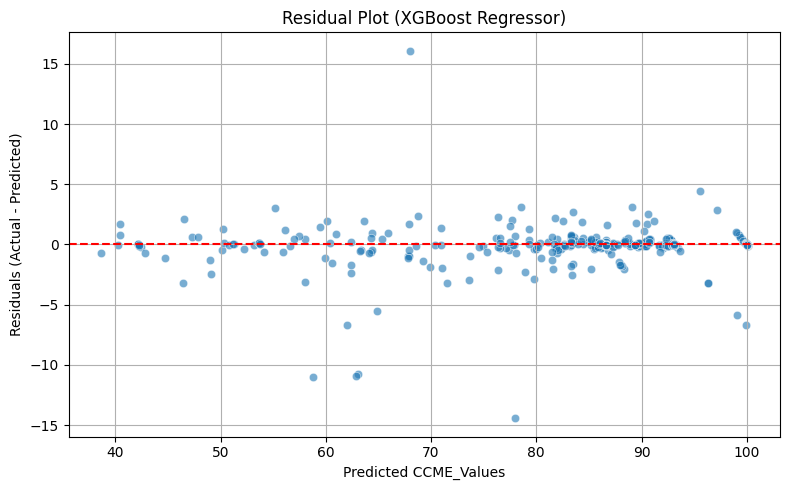

In [47]:
# residuals
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_r, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CCME_Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (XGBoost Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


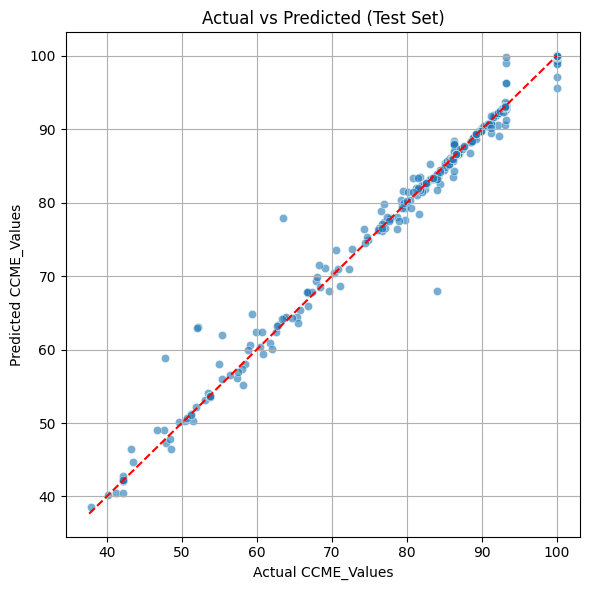

In [48]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual CCME_Values')
plt.ylabel('Predicted CCME_Values')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
import numpy as np

# Standarizar
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(canada_df[feature_cols])

# KFold-like split (aunque unsupervised)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, test_idx in kf.split(X_scaled):
    X_fold = X_scaled[train_idx]
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X_fold)
    
    # no "y")
    score = silhouette_score(X_fold, kmeans.labels_)
    scores.append(score)

print("Silhouette scores per fold:", np.round(scores, 3))
print("Average silhouette score:", np.mean(scores).round(3))


Silhouette scores per fold: [0.297 0.304 0.244 0.241 0.246]
Average silhouette score: 0.266


In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Επιλογή χαρακτηριστικών και κανονικοποίηση ===
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

X = canada_df[feature_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Υπολογισμός Silhouette Scores για διαφορετικά k ===
silhouette_scores = []

print("Silhouette Scores για k από 2 έως 9:")
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k = {k} → silhouette = {score:.3f}")




Silhouette Scores για k από 2 έως 9:
k = 2 → silhouette = 0.744
k = 3 → silhouette = 0.473
k = 4 → silhouette = 0.295
k = 5 → silhouette = 0.284
k = 6 → silhouette = 0.283
k = 7 → silhouette = 0.238
k = 8 → silhouette = 0.271
k = 9 → silhouette = 0.275


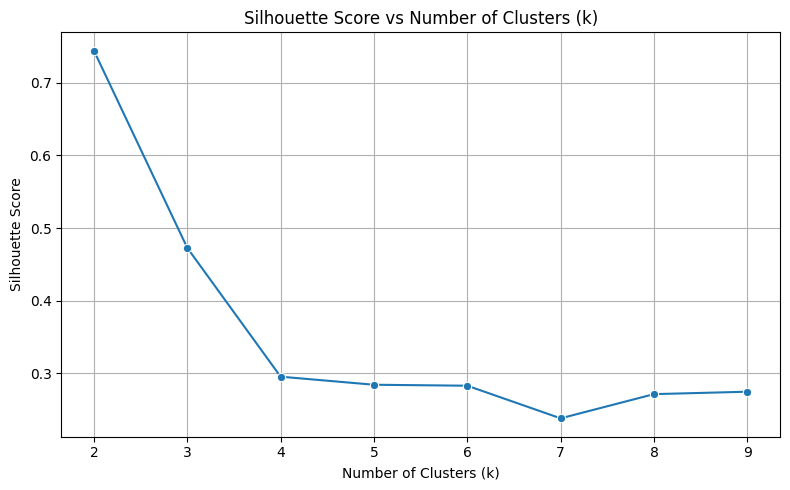

In [51]:
# === 3. Οπτικοποίηση αποτελεσμάτων ===
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(2, 10), y=silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

🔎 Silhouette Scores:
KMeans  (PCA):  0.781
GMM     (PCA):  0.355


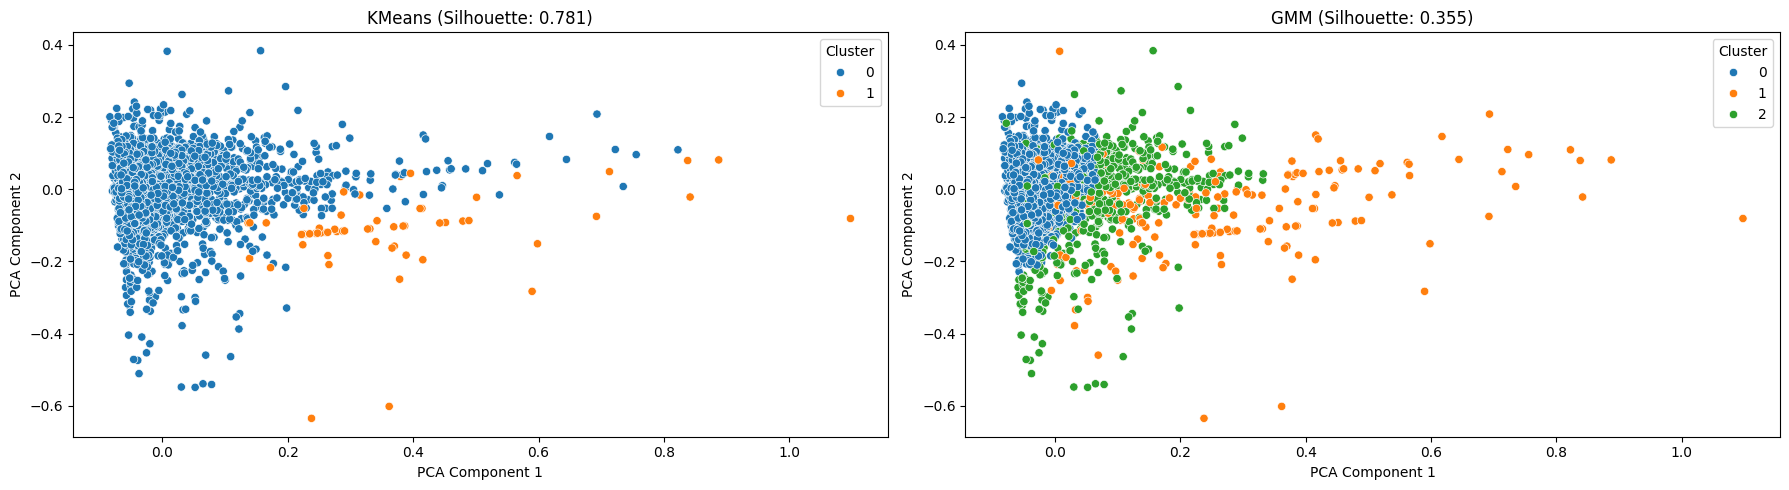

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Προετοιμασία Δεδομένων ===
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

X = canada_df[feature_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === 2. PCA ===
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# === 3. KMeans on PCA ===
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
sil_kmeans = silhouette_score(X_pca, kmeans_labels)

# === 4. GMM on PCA ===
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
sil_gmm = silhouette_score(X_pca, gmm_labels)

# === 6. Σύγκριση Silhouette Scores ===
print("🔎 Silhouette Scores:")
print(f"KMeans  (PCA):  {sil_kmeans:.3f}")
print(f"GMM     (PCA):  {sil_gmm:.3f}")

# === 7. Οπτικοποίηση ===
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', ax=axes[0])
axes[0].set_title(f'KMeans (Silhouette: {sil_kmeans:.3f})')

# GMM
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='tab10', ax=axes[1])
axes[1].set_title(f'GMM (Silhouette: {sil_gmm:.3f})')

for ax in axes:
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(title="Cluster", loc='best')

plt.tight_layout()
plt.show()


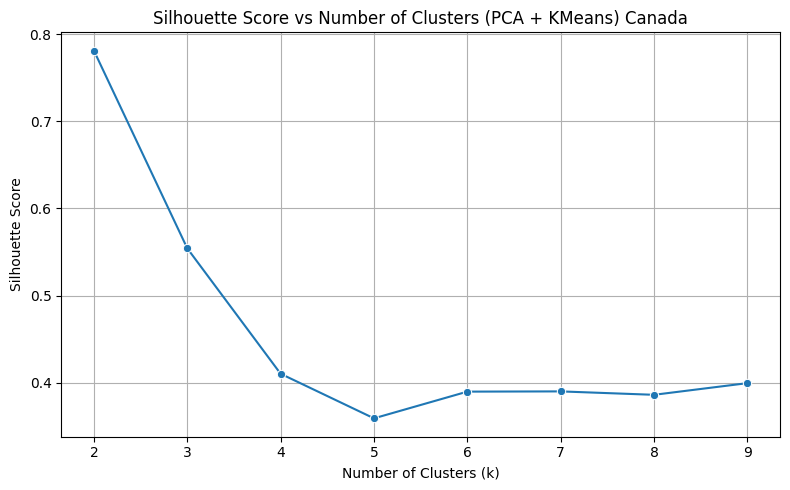

In [59]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# === PCA πριν το clustering ===
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# === Silhouette για διάφορα k πάνω σε PCA-transformed data ===
silhouette_pca_scores = []

k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_pca_scores.append(score)

# === Γράφημα ===
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=silhouette_pca_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (PCA + KMeans) Canada")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


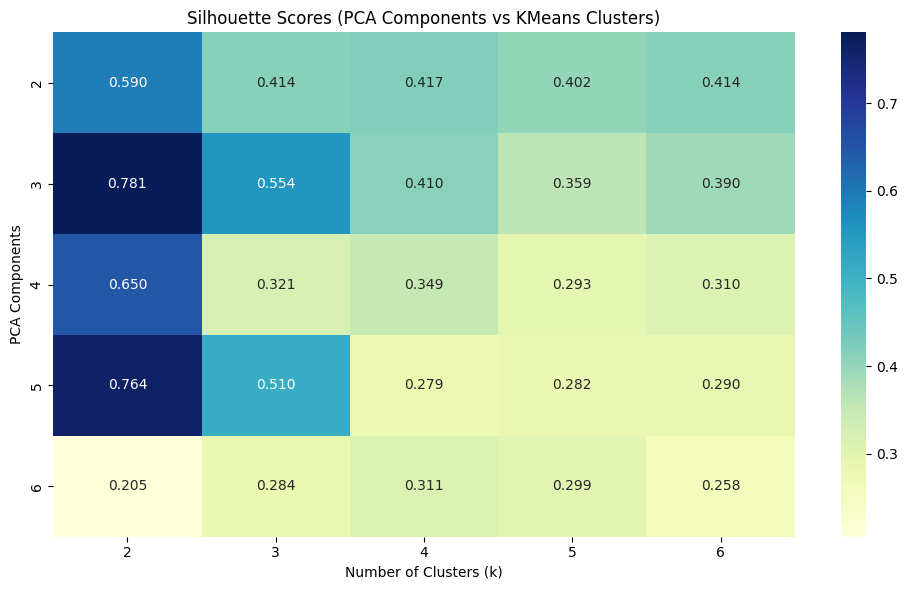

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range
component_range = range(2, 7)  # PCA components: 2 a 6
k_range = range(2, 7)     # Clusters: 3 a 4

# Guardar resultados
results = []

for n_comp in component_range:
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        results.append({
            'n_components': n_comp,
            'k': k,
            'silhouette': score
        })

# Convertir a DataFrame
results_df = pd.DataFrame(results)

# Pivot por  heatmap
heatmap_data = results_df.pivot(index='n_components', columns='k', values='silhouette')

# Visualicación
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Silhouette Scores (PCA Components vs KMeans Clusters)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("PCA Components")
plt.tight_layout()
plt.show()


#### Time Series 

In [15]:
from statsmodels.tsa.stattools import adfuller

canada_df["Date"] = pd.to_datetime(canada_df["Date"], format="%d-%m-%Y")

df = canada_df.sort_values("Date").reset_index(drop=True)

df[["Date"]].head()

daily_ccme = canada_df.groupby("Date")["CCME_Values"].mean()

adf_result = adfuller(daily_ccme.dropna())

adf_output = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Used Lags": adf_result[2],
    "Number of Observations": adf_result[3],
    "Critical Values": adf_result[4],
    "Stationary": adf_result[1] < 0.05  
}

adf_output


{'ADF Statistic': -4.292009285613876,
 'p-value': 0.00045858067492587906,
 'Used Lags': 19,
 'Number of Observations': 1293,
 'Critical Values': {'1%': -3.4354175403897727,
  '5%': -2.8637778952086848,
  '10%': -2.5679614713589562},
 'Stationary': True}

c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Aggelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available.

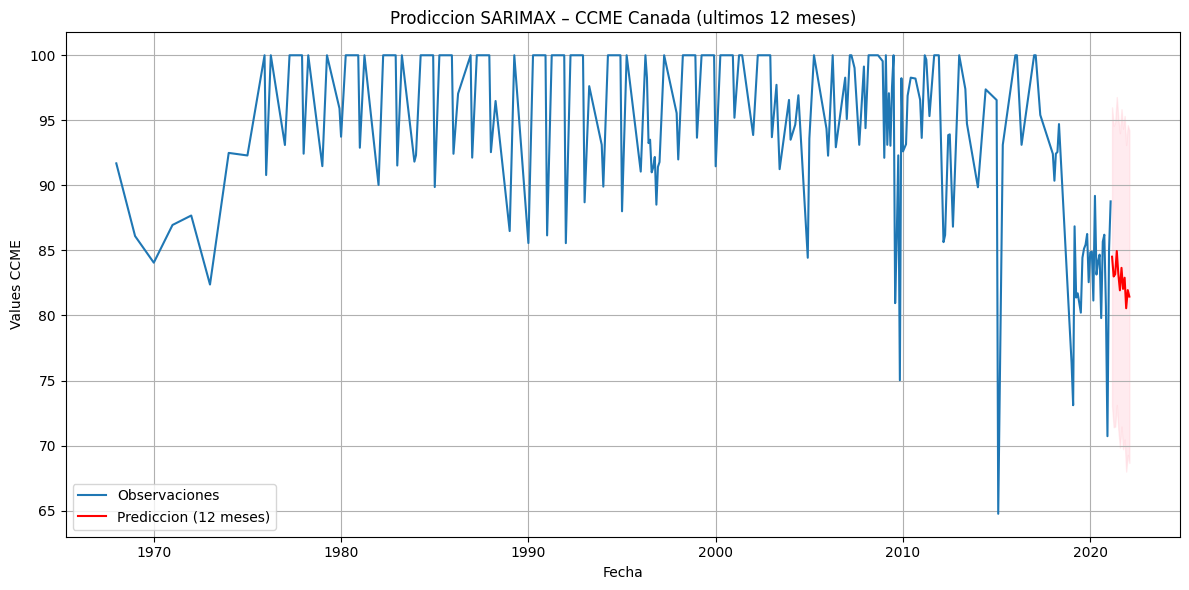

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

canada_df = pd.read_csv("data\Canada_dataset.csv")
canada_df["Date"] = pd.to_datetime(canada_df["Date"], format="%d-%m-%Y")
canada_df["month_year"] = canada_df["Date"].dt.to_period("M")

canada_ts = canada_df.groupby("month_year")["CCME_Values"].mean().dropna()
canada_ts.index = canada_ts.index.to_timestamp()  

model = sm.tsa.SARIMAX(
    canada_ts,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=canada_ts.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(canada_ts.index, canada_ts, label='Observaciones')
plt.plot(forecast_index, forecast_mean, color='red', label='Prediccion (12 meses)')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Prodiccion SARIMAX – CCME Canada (ultimos 12 meses)')
plt.xlabel('Fecha')
plt.ylabel('Values CCME')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


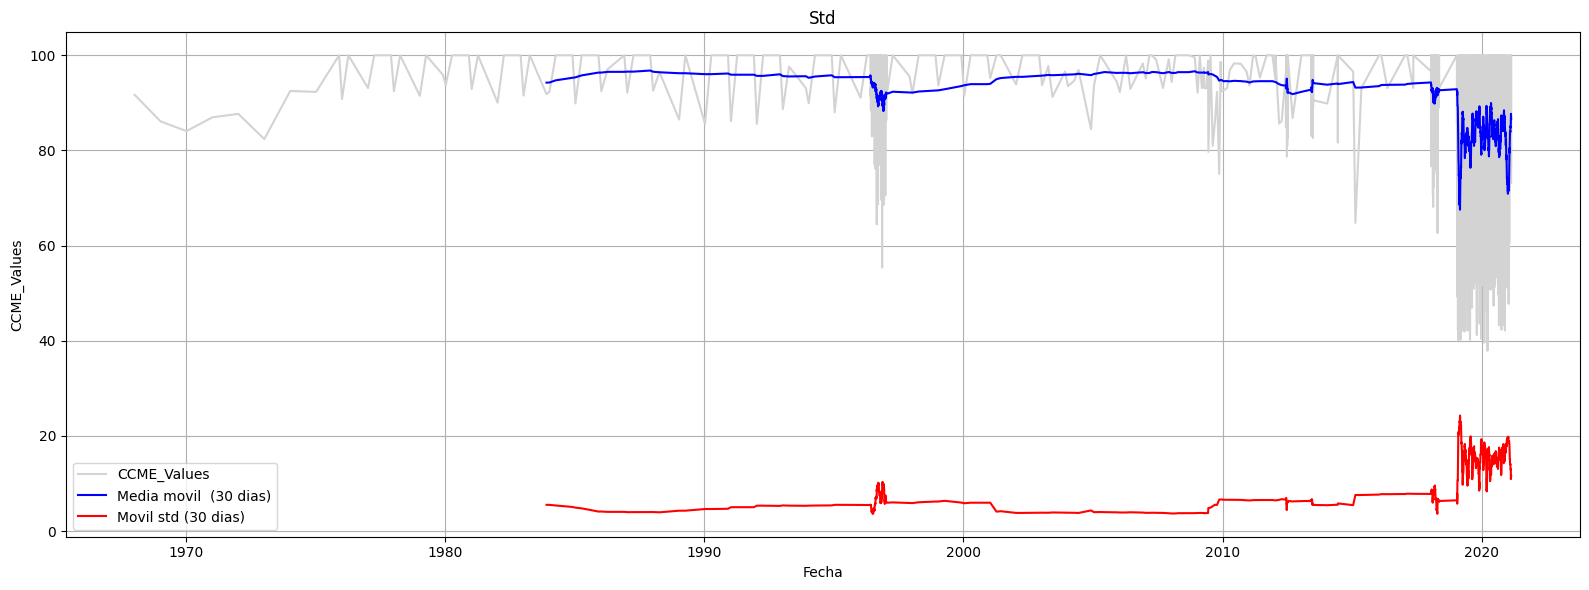

C:\Users\Aggelos\AppData\Local\Temp\ipykernel_15460\3851255607.py:33: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, kpss_crit = kpss(daily_ccme.dropna(), regression='c', nlags="auto")


{'ADF Test': {'Statistic': -4.292009285613876,
  'p-value': 0.00045858067492587906,
  'Critical Values': {'1%': -3.4354175403897727,
   '5%': -2.8637778952086848,
   '10%': -2.5679614713589562},
  'Stationary (ADF)': True},
 'KPSS Test': {'Statistic': 3.290422068027699,
  'p-value': 0.01,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739},
  'Stationary (KPSS)': False}}

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

file_path = "data/Canada_dataset.csv"
canada_df = pd.read_csv(file_path)


canada_df["Date"] = pd.to_datetime(canada_df["Date"], format="%d-%m-%Y")
daily_ccme = canada_df.groupby("Date")["CCME_Values"].mean()

#  rolling mean  std (30 dias)
rolling_mean = daily_ccme.rolling(window=30).mean()
rolling_std = daily_ccme.rolling(window=30).std()

# rolling mean & std
plt.figure(figsize=(16, 6))
plt.plot(daily_ccme, color='lightgray', label='CCME_Values')
plt.plot(rolling_mean, color='blue', label='Media movil  (30 dias)')
plt.plot(rolling_std, color='red', label='Movil std (30 dias)')
plt.title("Std")
plt.xlabel("Fecha")
plt.ylabel("CCME_Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

adf_stat, adf_p, _, _, adf_crit, _ = adfuller(daily_ccme.dropna())

kpss_stat, kpss_p, _, kpss_crit = kpss(daily_ccme.dropna(), regression='c', nlags="auto")

{
    "ADF Test": {
        "Statistic": adf_stat,
        "p-value": adf_p,
        "Critical Values": adf_crit,
        "Stationary (ADF)": adf_p < 0.05
    },
    "KPSS Test": {
        "Statistic": kpss_stat,
        "p-value": kpss_p,
        "Critical Values": kpss_crit,
        "Stationary (KPSS)": kpss_p > 0.05
    }
}
